# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [7]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [10]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 3.865091e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.01714960793873207


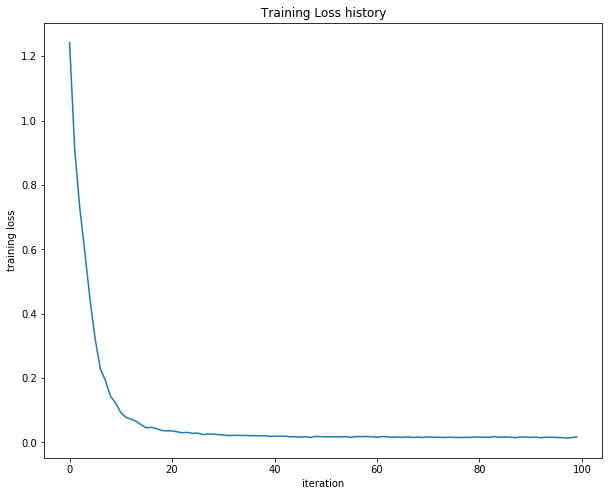

In [11]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [12]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [13]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

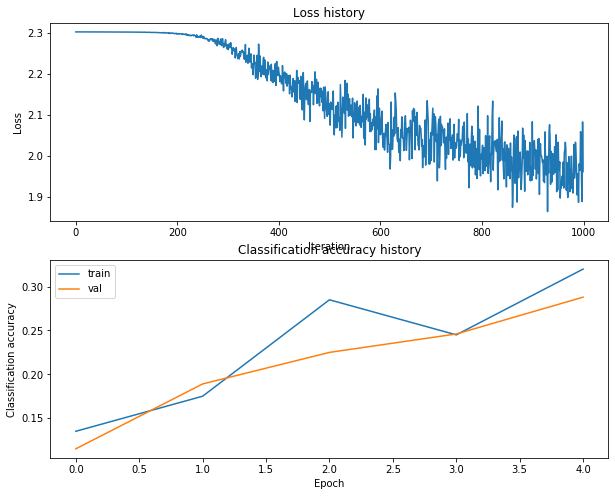

In [14]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

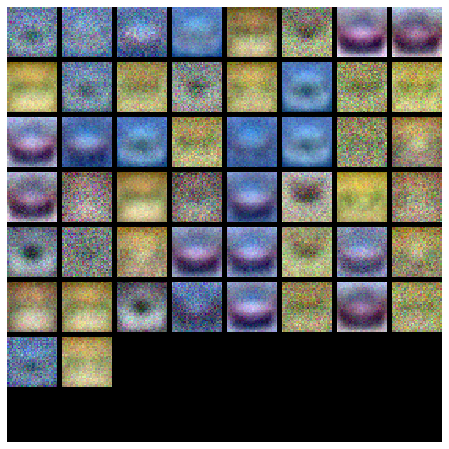

In [15]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [22]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

input_size = 32 * 32 * 3
num_classes = 10

# parameters to tune
hidden_sizes = [20, 50, 100, 1000]
learning_rates = [1e-4, 2.5e-4, 5e-4, 7.5e-4]
batch_sizes = [32, 64, 128, 256, 512]
regs = [0.0, 0.1, 0.25, 1, 10]

max_val_acc = -1

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for reg in regs:
                
                print('hidden_size, learning_rate, batch_size, reg')
                print(hidden_size, learning_rate, batch_size, reg)

                net = TwoLayerNet(input_size, hidden_size, num_classes)

                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1000, batch_size=batch_size,
                            learning_rate=learning_rate, learning_rate_decay=0.95,
                            reg=reg, verbose=True)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                
                if val_acc > max_val_acc:
                    max_val_acc = val_acc
                    best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


hidden_size, learning_rate, batch_size, reg
20 0.0001 32 0.0
iteration 0 / 1000: loss 2.302566
iteration 100 / 1000: loss 2.302365
iteration 200 / 1000: loss 2.300298
iteration 300 / 1000: loss 2.283114
iteration 400 / 1000: loss 2.166880
iteration 500 / 1000: loss 2.065576
iteration 600 / 1000: loss 2.070065
iteration 700 / 1000: loss 2.066724
iteration 800 / 1000: loss 2.118205
iteration 900 / 1000: loss 1.993798
Validation accuracy:  0.276
hidden_size, learning_rate, batch_size, reg
20 0.0001 32 0.1
iteration 0 / 1000: loss 2.302646
iteration 100 / 1000: loss 2.302373
iteration 200 / 1000: loss 2.297500
iteration 300 / 1000: loss 2.270137
iteration 400 / 1000: loss 2.240481
iteration 500 / 1000: loss 2.146319
iteration 600 / 1000: loss 1.993340
iteration 700 / 1000: loss 2.016095
iteration 800 / 1000: loss 2.048045
iteration 900 / 1000: loss 1.882690
Validation accuracy:  0.277
hidden_size, learning_rate, batch_size, reg
20 0.0001 32 0.25
iteration 0 / 1000: loss 2.302744
iteration 

iteration 300 / 1000: loss 2.276732
iteration 400 / 1000: loss 2.207131
iteration 500 / 1000: loss 2.119984
iteration 600 / 1000: loss 2.123679
iteration 700 / 1000: loss 2.056367
iteration 800 / 1000: loss 2.104322
iteration 900 / 1000: loss 2.014126
Validation accuracy:  0.288
hidden_size, learning_rate, batch_size, reg
20 0.0001 256 10
iteration 0 / 1000: loss 2.308753
iteration 100 / 1000: loss 2.306732
iteration 200 / 1000: loss 2.304942
iteration 300 / 1000: loss 2.297969
iteration 400 / 1000: loss 2.268089
iteration 500 / 1000: loss 2.243937
iteration 600 / 1000: loss 2.250126
iteration 700 / 1000: loss 2.205967
iteration 800 / 1000: loss 2.162061
iteration 900 / 1000: loss 2.150618
Validation accuracy:  0.25
hidden_size, learning_rate, batch_size, reg
20 0.0001 512 0.0
iteration 0 / 1000: loss 2.302593
iteration 100 / 1000: loss 2.302355
iteration 200 / 1000: loss 2.300369
iteration 300 / 1000: loss 2.278300
iteration 400 / 1000: loss 2.226488
iteration 500 / 1000: loss 2.15936

iteration 700 / 1000: loss 1.871597
iteration 800 / 1000: loss 1.821627
iteration 900 / 1000: loss 1.688019
Validation accuracy:  0.377
hidden_size, learning_rate, batch_size, reg
20 0.00025 128 0.25
iteration 0 / 1000: loss 2.302733
iteration 100 / 1000: loss 2.299377
iteration 200 / 1000: loss 2.158257
iteration 300 / 1000: loss 2.094609
iteration 400 / 1000: loss 1.914499
iteration 500 / 1000: loss 1.996302
iteration 600 / 1000: loss 1.976524
iteration 700 / 1000: loss 1.789279
iteration 800 / 1000: loss 1.742428
iteration 900 / 1000: loss 1.872293
Validation accuracy:  0.37
hidden_size, learning_rate, batch_size, reg
20 0.00025 128 1
iteration 0 / 1000: loss 2.303191
iteration 100 / 1000: loss 2.299851
iteration 200 / 1000: loss 2.109284
iteration 300 / 1000: loss 2.095227
iteration 400 / 1000: loss 2.019300
iteration 500 / 1000: loss 1.825411
iteration 600 / 1000: loss 1.883010
iteration 700 / 1000: loss 1.884856
iteration 800 / 1000: loss 1.919789
iteration 900 / 1000: loss 1.896

iteration 200 / 1000: loss 1.946670
iteration 300 / 1000: loss 1.700342
iteration 400 / 1000: loss 1.864651
iteration 500 / 1000: loss 1.722422
iteration 600 / 1000: loss 1.777290
iteration 700 / 1000: loss 1.791673
iteration 800 / 1000: loss 1.809197
iteration 900 / 1000: loss 1.619245
Validation accuracy:  0.427
hidden_size, learning_rate, batch_size, reg
20 0.0005 64 0.1
iteration 0 / 1000: loss 2.302653
iteration 100 / 1000: loss 2.184099
iteration 200 / 1000: loss 1.929474
iteration 300 / 1000: loss 1.991301
iteration 400 / 1000: loss 1.655364
iteration 500 / 1000: loss 1.720647
iteration 600 / 1000: loss 1.713578
iteration 700 / 1000: loss 1.715745
iteration 800 / 1000: loss 1.560220
iteration 900 / 1000: loss 1.834823
Validation accuracy:  0.403
hidden_size, learning_rate, batch_size, reg
20 0.0005 64 0.25
iteration 0 / 1000: loss 2.302732
iteration 100 / 1000: loss 2.150149
iteration 200 / 1000: loss 1.974824
iteration 300 / 1000: loss 1.958674
iteration 400 / 1000: loss 1.7902

iteration 600 / 1000: loss 1.734780
iteration 700 / 1000: loss 1.756664
iteration 800 / 1000: loss 1.758041
iteration 900 / 1000: loss 1.729863
Validation accuracy:  0.446
hidden_size, learning_rate, batch_size, reg
20 0.0005 512 10
iteration 0 / 1000: loss 2.308715
iteration 100 / 1000: loss 2.229375
iteration 200 / 1000: loss 2.186372
iteration 300 / 1000: loss 2.076122
iteration 400 / 1000: loss 2.056780
iteration 500 / 1000: loss 2.051470
iteration 600 / 1000: loss 2.083923
iteration 700 / 1000: loss 2.056808
iteration 800 / 1000: loss 2.088486
iteration 900 / 1000: loss 2.082761
Validation accuracy:  0.34
hidden_size, learning_rate, batch_size, reg
20 0.00075 32 0.0
iteration 0 / 1000: loss 2.302608
iteration 100 / 1000: loss 1.965452
iteration 200 / 1000: loss 1.555884
iteration 300 / 1000: loss 1.751025
iteration 400 / 1000: loss 1.590917
iteration 500 / 1000: loss 1.620185
iteration 600 / 1000: loss 1.813688
iteration 700 / 1000: loss 1.639399
iteration 800 / 1000: loss 1.97978

Validation accuracy:  0.463
hidden_size, learning_rate, batch_size, reg
20 0.00075 256 0.25
iteration 0 / 1000: loss 2.302733
iteration 100 / 1000: loss 2.049216
iteration 200 / 1000: loss 1.924837
iteration 300 / 1000: loss 1.818967
iteration 400 / 1000: loss 1.713097
iteration 500 / 1000: loss 1.675212
iteration 600 / 1000: loss 1.691274
iteration 700 / 1000: loss 1.665794
iteration 800 / 1000: loss 1.528675
iteration 900 / 1000: loss 1.524060
Validation accuracy:  0.427
hidden_size, learning_rate, batch_size, reg
20 0.00075 256 1
iteration 0 / 1000: loss 2.303196
iteration 100 / 1000: loss 2.025833
iteration 200 / 1000: loss 1.870016
iteration 300 / 1000: loss 1.780545
iteration 400 / 1000: loss 1.857060
iteration 500 / 1000: loss 1.703807
iteration 600 / 1000: loss 1.760099
iteration 700 / 1000: loss 1.744539
iteration 800 / 1000: loss 1.732002
iteration 900 / 1000: loss 1.642749
Validation accuracy:  0.441
hidden_size, learning_rate, batch_size, reg
20 0.00075 256 10
iteration 0 /

iteration 200 / 1000: loss 2.297042
iteration 300 / 1000: loss 2.249295
iteration 400 / 1000: loss 2.200874
iteration 500 / 1000: loss 2.174715
iteration 600 / 1000: loss 1.982913
iteration 700 / 1000: loss 2.004337
iteration 800 / 1000: loss 1.991977
iteration 900 / 1000: loss 2.005948
Validation accuracy:  0.283
hidden_size, learning_rate, batch_size, reg
50 0.0001 128 0.1
iteration 0 / 1000: loss 2.302711
iteration 100 / 1000: loss 2.302415
iteration 200 / 1000: loss 2.296609
iteration 300 / 1000: loss 2.271862
iteration 400 / 1000: loss 2.176741
iteration 500 / 1000: loss 2.130308
iteration 600 / 1000: loss 2.078402
iteration 700 / 1000: loss 1.958436
iteration 800 / 1000: loss 2.017876
iteration 900 / 1000: loss 1.997514
Validation accuracy:  0.29
hidden_size, learning_rate, batch_size, reg
50 0.0001 128 0.25
iteration 0 / 1000: loss 2.302987
iteration 100 / 1000: loss 2.302398
iteration 200 / 1000: loss 2.298432
iteration 300 / 1000: loss 2.265221
iteration 400 / 1000: loss 2.180

iteration 600 / 1000: loss 1.968572
iteration 700 / 1000: loss 2.066355
iteration 800 / 1000: loss 1.904323
iteration 900 / 1000: loss 1.802582
Validation accuracy:  0.372
hidden_size, learning_rate, batch_size, reg
50 0.00025 32 10
iteration 0 / 1000: loss 2.318046
iteration 100 / 1000: loss 2.304722
iteration 200 / 1000: loss 2.223347
iteration 300 / 1000: loss 2.213298
iteration 400 / 1000: loss 2.024199
iteration 500 / 1000: loss 2.261230
iteration 600 / 1000: loss 2.237017
iteration 700 / 1000: loss 2.139260
iteration 800 / 1000: loss 1.955287
iteration 900 / 1000: loss 2.059265
Validation accuracy:  0.313
hidden_size, learning_rate, batch_size, reg
50 0.00025 64 0.0
iteration 0 / 1000: loss 2.302578
iteration 100 / 1000: loss 2.282810
iteration 200 / 1000: loss 2.100859
iteration 300 / 1000: loss 1.979128
iteration 400 / 1000: loss 1.955362
iteration 500 / 1000: loss 2.041849
iteration 600 / 1000: loss 1.810088
iteration 700 / 1000: loss 1.790856
iteration 800 / 1000: loss 1.7395

Validation accuracy:  0.394
hidden_size, learning_rate, batch_size, reg
50 0.00025 512 0.25
iteration 0 / 1000: loss 2.302963
iteration 100 / 1000: loss 2.294781
iteration 200 / 1000: loss 2.132321
iteration 300 / 1000: loss 1.997790
iteration 400 / 1000: loss 1.919016
iteration 500 / 1000: loss 1.920225
iteration 600 / 1000: loss 1.883355
iteration 700 / 1000: loss 1.837289
iteration 800 / 1000: loss 1.780300
iteration 900 / 1000: loss 1.742448
Validation accuracy:  0.382
hidden_size, learning_rate, batch_size, reg
50 0.00025 512 1
iteration 0 / 1000: loss 2.304159
iteration 100 / 1000: loss 2.291743
iteration 200 / 1000: loss 2.146686
iteration 300 / 1000: loss 1.980723
iteration 400 / 1000: loss 1.952145
iteration 500 / 1000: loss 1.916505
iteration 600 / 1000: loss 1.862042
iteration 700 / 1000: loss 1.788115
iteration 800 / 1000: loss 1.772518
iteration 900 / 1000: loss 1.755810
Validation accuracy:  0.385
hidden_size, learning_rate, batch_size, reg
50 0.00025 512 10
iteration 0 /

iteration 200 / 1000: loss 1.932472
iteration 300 / 1000: loss 1.806941
iteration 400 / 1000: loss 1.804401
iteration 500 / 1000: loss 1.728505
iteration 600 / 1000: loss 1.561563
iteration 700 / 1000: loss 1.670717
iteration 800 / 1000: loss 1.543229
iteration 900 / 1000: loss 1.550939
Validation accuracy:  0.445
hidden_size, learning_rate, batch_size, reg
50 0.0005 256 0.1
iteration 0 / 1000: loss 2.302719
iteration 100 / 1000: loss 2.123914
iteration 200 / 1000: loss 1.905425
iteration 300 / 1000: loss 1.833481
iteration 400 / 1000: loss 1.753881
iteration 500 / 1000: loss 1.736161
iteration 600 / 1000: loss 1.577958
iteration 700 / 1000: loss 1.608993
iteration 800 / 1000: loss 1.591522
iteration 900 / 1000: loss 1.642241
Validation accuracy:  0.451
hidden_size, learning_rate, batch_size, reg
50 0.0005 256 0.25
iteration 0 / 1000: loss 2.303001
iteration 100 / 1000: loss 2.097811
iteration 200 / 1000: loss 1.939640
iteration 300 / 1000: loss 1.859287
iteration 400 / 1000: loss 1.82

iteration 600 / 1000: loss 1.793484
iteration 700 / 1000: loss 1.675630
iteration 800 / 1000: loss 1.710125
iteration 900 / 1000: loss 1.753491
Validation accuracy:  0.442
hidden_size, learning_rate, batch_size, reg
50 0.00075 64 10
iteration 0 / 1000: loss 2.317966
iteration 100 / 1000: loss 2.209587
iteration 200 / 1000: loss 2.149241
iteration 300 / 1000: loss 2.006117
iteration 400 / 1000: loss 2.100763
iteration 500 / 1000: loss 1.944005
iteration 600 / 1000: loss 2.000693
iteration 700 / 1000: loss 2.037014
iteration 800 / 1000: loss 2.039231
iteration 900 / 1000: loss 2.178814
Validation accuracy:  0.347
hidden_size, learning_rate, batch_size, reg
50 0.00075 128 0.0
iteration 0 / 1000: loss 2.302599
iteration 100 / 1000: loss 2.040704
iteration 200 / 1000: loss 1.811925
iteration 300 / 1000: loss 1.780171
iteration 400 / 1000: loss 1.679218
iteration 500 / 1000: loss 1.602167
iteration 600 / 1000: loss 1.610582
iteration 700 / 1000: loss 1.525276
iteration 800 / 1000: loss 1.583

Validation accuracy:  0.313
hidden_size, learning_rate, batch_size, reg
100 0.0001 32 0.25
iteration 0 / 1000: loss 2.303333
iteration 100 / 1000: loss 2.302267
iteration 200 / 1000: loss 2.254957
iteration 300 / 1000: loss 2.250187
iteration 400 / 1000: loss 2.157797
iteration 500 / 1000: loss 2.202259
iteration 600 / 1000: loss 2.090289
iteration 700 / 1000: loss 1.954425
iteration 800 / 1000: loss 1.956375
iteration 900 / 1000: loss 1.966246
Validation accuracy:  0.309
hidden_size, learning_rate, batch_size, reg
100 0.0001 32 1
iteration 0 / 1000: loss 2.305683
iteration 100 / 1000: loss 2.304692
iteration 200 / 1000: loss 2.292244
iteration 300 / 1000: loss 2.145383
iteration 400 / 1000: loss 2.220802
iteration 500 / 1000: loss 2.067613
iteration 600 / 1000: loss 2.017083
iteration 700 / 1000: loss 2.047526
iteration 800 / 1000: loss 2.096854
iteration 900 / 1000: loss 2.030587
Validation accuracy:  0.308
hidden_size, learning_rate, batch_size, reg
100 0.0001 32 10
iteration 0 / 10

iteration 200 / 1000: loss 2.293816
iteration 300 / 1000: loss 2.240236
iteration 400 / 1000: loss 2.153870
iteration 500 / 1000: loss 2.098077
iteration 600 / 1000: loss 2.038164
iteration 700 / 1000: loss 2.048242
iteration 800 / 1000: loss 2.019031
iteration 900 / 1000: loss 1.926060
Validation accuracy:  0.308
hidden_size, learning_rate, batch_size, reg
100 0.0001 512 0.1
iteration 0 / 1000: loss 2.302897
iteration 100 / 1000: loss 2.301960
iteration 200 / 1000: loss 2.295776
iteration 300 / 1000: loss 2.241261
iteration 400 / 1000: loss 2.183394
iteration 500 / 1000: loss 2.102185
iteration 600 / 1000: loss 2.040064
iteration 700 / 1000: loss 1.952702
iteration 800 / 1000: loss 1.973980
iteration 900 / 1000: loss 1.923919
Validation accuracy:  0.304
hidden_size, learning_rate, batch_size, reg
100 0.0001 512 0.25
iteration 0 / 1000: loss 2.303367
iteration 100 / 1000: loss 2.302505
iteration 200 / 1000: loss 2.293744
iteration 300 / 1000: loss 2.240801
iteration 400 / 1000: loss 2.

iteration 600 / 1000: loss 2.011973
iteration 700 / 1000: loss 1.757419
iteration 800 / 1000: loss 1.756404
iteration 900 / 1000: loss 1.844934
Validation accuracy:  0.394
hidden_size, learning_rate, batch_size, reg
100 0.00025 128 10
iteration 0 / 1000: loss 2.333476
iteration 100 / 1000: loss 2.301072
iteration 200 / 1000: loss 2.187088
iteration 300 / 1000: loss 2.153305
iteration 400 / 1000: loss 2.251283
iteration 500 / 1000: loss 2.090294
iteration 600 / 1000: loss 2.150264
iteration 700 / 1000: loss 2.090217
iteration 800 / 1000: loss 2.085822
iteration 900 / 1000: loss 2.008869
Validation accuracy:  0.32
hidden_size, learning_rate, batch_size, reg
100 0.00025 256 0.0
iteration 0 / 1000: loss 2.302571
iteration 100 / 1000: loss 2.268192
iteration 200 / 1000: loss 2.052647
iteration 300 / 1000: loss 1.982053
iteration 400 / 1000: loss 1.859056
iteration 500 / 1000: loss 1.826058
iteration 600 / 1000: loss 1.879568
iteration 700 / 1000: loss 1.739733
iteration 800 / 1000: loss 1.6

Validation accuracy:  0.424
hidden_size, learning_rate, batch_size, reg
100 0.0005 64 0.25
iteration 0 / 1000: loss 2.303390
iteration 100 / 1000: loss 2.043017
iteration 200 / 1000: loss 1.743015
iteration 300 / 1000: loss 1.849546
iteration 400 / 1000: loss 1.706439
iteration 500 / 1000: loss 1.752323
iteration 600 / 1000: loss 1.789664
iteration 700 / 1000: loss 1.846593
iteration 800 / 1000: loss 1.622625
iteration 900 / 1000: loss 1.389961
Validation accuracy:  0.447
hidden_size, learning_rate, batch_size, reg
100 0.0005 64 1
iteration 0 / 1000: loss 2.305692
iteration 100 / 1000: loss 2.102941
iteration 200 / 1000: loss 2.044723
iteration 300 / 1000: loss 1.929203
iteration 400 / 1000: loss 1.820439
iteration 500 / 1000: loss 1.658645
iteration 600 / 1000: loss 1.658390
iteration 700 / 1000: loss 1.750688
iteration 800 / 1000: loss 1.685686
iteration 900 / 1000: loss 1.874352
Validation accuracy:  0.44
hidden_size, learning_rate, batch_size, reg
100 0.0005 64 10
iteration 0 / 100

iteration 100 / 1000: loss 2.072264
iteration 200 / 1000: loss 2.022363
iteration 300 / 1000: loss 1.726328
iteration 400 / 1000: loss 1.787576
iteration 500 / 1000: loss 2.065873
iteration 600 / 1000: loss 1.460072
iteration 700 / 1000: loss 1.791754
iteration 800 / 1000: loss 1.583197
iteration 900 / 1000: loss 1.730618
Validation accuracy:  0.421
hidden_size, learning_rate, batch_size, reg
100 0.00075 32 0.1
iteration 0 / 1000: loss 2.302882
iteration 100 / 1000: loss 2.200707
iteration 200 / 1000: loss 1.927148
iteration 300 / 1000: loss 2.177503
iteration 400 / 1000: loss 1.596142
iteration 500 / 1000: loss 1.949097
iteration 600 / 1000: loss 1.661281
iteration 700 / 1000: loss 1.769812
iteration 800 / 1000: loss 1.694814
iteration 900 / 1000: loss 1.685773
Validation accuracy:  0.422
hidden_size, learning_rate, batch_size, reg
100 0.00075 32 0.25
iteration 0 / 1000: loss 2.303317
iteration 100 / 1000: loss 1.861015
iteration 200 / 1000: loss 1.898698
iteration 300 / 1000: loss 1.

iteration 500 / 1000: loss 1.703788
iteration 600 / 1000: loss 1.624302
iteration 700 / 1000: loss 1.756107
iteration 800 / 1000: loss 1.597376
iteration 900 / 1000: loss 1.697760
Validation accuracy:  0.457
hidden_size, learning_rate, batch_size, reg
100 0.00075 256 10
iteration 0 / 1000: loss 2.333543
iteration 100 / 1000: loss 2.173556
iteration 200 / 1000: loss 2.087548
iteration 300 / 1000: loss 2.082104
iteration 400 / 1000: loss 2.083324
iteration 500 / 1000: loss 2.058859
iteration 600 / 1000: loss 2.053714
iteration 700 / 1000: loss 2.092178
iteration 800 / 1000: loss 2.062562
iteration 900 / 1000: loss 2.131273
Validation accuracy:  0.332
hidden_size, learning_rate, batch_size, reg
100 0.00075 512 0.0
iteration 0 / 1000: loss 2.302599
iteration 100 / 1000: loss 2.046581
iteration 200 / 1000: loss 1.817655
iteration 300 / 1000: loss 1.744974
iteration 400 / 1000: loss 1.664372
iteration 500 / 1000: loss 1.540727
iteration 600 / 1000: loss 1.458807
iteration 700 / 1000: loss 1.

iteration 900 / 1000: loss 1.892853
Validation accuracy:  0.336
hidden_size, learning_rate, batch_size, reg
1000 0.0001 128 0.25
iteration 0 / 1000: loss 2.310259
iteration 100 / 1000: loss 2.301406
iteration 200 / 1000: loss 2.266494
iteration 300 / 1000: loss 2.163839
iteration 400 / 1000: loss 2.015350
iteration 500 / 1000: loss 2.037891
iteration 600 / 1000: loss 2.047772
iteration 700 / 1000: loss 1.983622
iteration 800 / 1000: loss 1.931402
iteration 900 / 1000: loss 1.931221
Validation accuracy:  0.329
hidden_size, learning_rate, batch_size, reg
1000 0.0001 128 1
iteration 0 / 1000: loss 2.333245
iteration 100 / 1000: loss 2.325580
iteration 200 / 1000: loss 2.266195
iteration 300 / 1000: loss 2.225047
iteration 400 / 1000: loss 2.135952
iteration 500 / 1000: loss 2.046652
iteration 600 / 1000: loss 2.095223
iteration 700 / 1000: loss 2.002944
iteration 800 / 1000: loss 2.014275
iteration 900 / 1000: loss 1.897722
Validation accuracy:  0.33
hidden_size, learning_rate, batch_size

iteration 100 / 1000: loss 2.230115
iteration 200 / 1000: loss 2.156903
iteration 300 / 1000: loss 1.867205
iteration 400 / 1000: loss 1.845125
iteration 500 / 1000: loss 1.838831
iteration 600 / 1000: loss 1.798704
iteration 700 / 1000: loss 1.815007
iteration 800 / 1000: loss 1.727370
iteration 900 / 1000: loss 1.724752
Validation accuracy:  0.428
hidden_size, learning_rate, batch_size, reg
1000 0.00025 64 0.1
iteration 0 / 1000: loss 2.305599
iteration 100 / 1000: loss 2.158914
iteration 200 / 1000: loss 2.140096
iteration 300 / 1000: loss 1.985510
iteration 400 / 1000: loss 1.902290
iteration 500 / 1000: loss 1.772127
iteration 600 / 1000: loss 1.849096
iteration 700 / 1000: loss 1.719082
iteration 800 / 1000: loss 1.900974
iteration 900 / 1000: loss 1.709411
Validation accuracy:  0.434
hidden_size, learning_rate, batch_size, reg
1000 0.00025 64 0.25
iteration 0 / 1000: loss 2.310469
iteration 100 / 1000: loss 2.229013
iteration 200 / 1000: loss 2.117037
iteration 300 / 1000: loss 

iteration 400 / 1000: loss 1.913747
iteration 500 / 1000: loss 1.841496
iteration 600 / 1000: loss 1.789980
iteration 700 / 1000: loss 1.842366
iteration 800 / 1000: loss 1.850250
iteration 900 / 1000: loss 1.815322
Validation accuracy:  0.422
hidden_size, learning_rate, batch_size, reg
1000 0.00025 512 10
iteration 0 / 1000: loss 2.610241
iteration 100 / 1000: loss 2.371181
iteration 200 / 1000: loss 2.147030
iteration 300 / 1000: loss 2.147441
iteration 400 / 1000: loss 2.083279
iteration 500 / 1000: loss 2.091234
iteration 600 / 1000: loss 2.078090
iteration 700 / 1000: loss 2.066246
iteration 800 / 1000: loss 2.130550
iteration 900 / 1000: loss 2.084010
Validation accuracy:  0.331
hidden_size, learning_rate, batch_size, reg
1000 0.0005 32 0.0
iteration 0 / 1000: loss 2.302519
iteration 100 / 1000: loss 1.850753
iteration 200 / 1000: loss 1.840712
iteration 300 / 1000: loss 1.769314
iteration 400 / 1000: loss 1.518872
iteration 500 / 1000: loss 1.655197
iteration 600 / 1000: loss 1.

iteration 800 / 1000: loss 1.483693
iteration 900 / 1000: loss 1.420377
Validation accuracy:  0.475
hidden_size, learning_rate, batch_size, reg
1000 0.0005 256 0.25
iteration 0 / 1000: loss 2.310306
iteration 100 / 1000: loss 2.030301
iteration 200 / 1000: loss 1.871039
iteration 300 / 1000: loss 1.762713
iteration 400 / 1000: loss 1.707943
iteration 500 / 1000: loss 1.585257
iteration 600 / 1000: loss 1.614844
iteration 700 / 1000: loss 1.574027
iteration 800 / 1000: loss 1.562994
iteration 900 / 1000: loss 1.508706
Validation accuracy:  0.468
hidden_size, learning_rate, batch_size, reg
1000 0.0005 256 1
iteration 0 / 1000: loss 2.333462
iteration 100 / 1000: loss 1.991791
iteration 200 / 1000: loss 1.822395
iteration 300 / 1000: loss 1.766825
iteration 400 / 1000: loss 1.759757
iteration 500 / 1000: loss 1.775059
iteration 600 / 1000: loss 1.664253
iteration 700 / 1000: loss 1.782157
iteration 800 / 1000: loss 1.696143
iteration 900 / 1000: loss 1.679484
Validation accuracy:  0.464
h

iteration 100 / 1000: loss 1.927717
iteration 200 / 1000: loss 1.746442
iteration 300 / 1000: loss 1.771055
iteration 400 / 1000: loss 1.779077
iteration 500 / 1000: loss 1.612405
iteration 600 / 1000: loss 1.698210
iteration 700 / 1000: loss 1.609339
iteration 800 / 1000: loss 1.559261
iteration 900 / 1000: loss 1.585434
Validation accuracy:  0.485
hidden_size, learning_rate, batch_size, reg
1000 0.00075 128 0.1
iteration 0 / 1000: loss 2.305597
iteration 100 / 1000: loss 2.062111
iteration 200 / 1000: loss 1.764500
iteration 300 / 1000: loss 1.807160
iteration 400 / 1000: loss 1.572954
iteration 500 / 1000: loss 1.509810
iteration 600 / 1000: loss 1.512004
iteration 700 / 1000: loss 1.521260
iteration 800 / 1000: loss 1.512790
iteration 900 / 1000: loss 1.453893
Validation accuracy:  0.47
hidden_size, learning_rate, batch_size, reg
1000 0.00075 128 0.25
iteration 0 / 1000: loss 2.310309
iteration 100 / 1000: loss 1.950723
iteration 200 / 1000: loss 1.687692
iteration 300 / 1000: loss

In [23]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.502


<IPython.core.display.Javascript object>


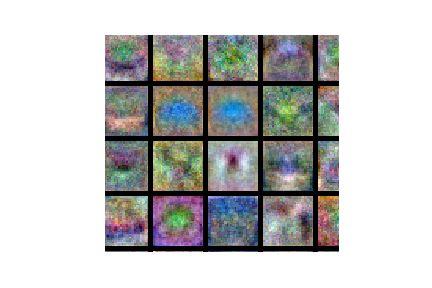

In [28]:
# Visualize the weights of the best network
%matplotlib notebook
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [25]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.505


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1, 3

$\color{blue}{\textit Your Explanation:}$
This phenomena is called overfit and it's cause by high varience of the model. We don't generelize well.
1. A larger dataset could be more diaverse, and we learn a better model.
2. Adding more hidden units means the model is more complex and more prone to overfit, thus it's not a good idea. 
3. Regularization is used to limit to model complexity, thus a case of overfit, it's a good idea to increase the regularization strength.

